find size of embedding (last layer of model) for each saved model

preprocess lvl embedding size


In [1]:
import torch
import timm
import sys
sys.path.append('..')
from models.fusion_model import FusionModel
from models.resnet_plus_model import ResNetPlusModel
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from data.wildlife_dataset import WildlifeDataModule
from wildlife_datasets import analysis, datasets, loader
from data.raptors_wildlife import Raptors


import yaml

# Load config from file
with open("/Users/amee/Documents/code/master-thesis/EagleID/configs/config-hpc-raptors.yml", "r") as f:
    config = yaml.safe_load(f)
# create a config dict
# config = {}
# config['wildlife_name'] = 'raptors'
# config['animal_cat'] = 'bird'
config['dataset'] = '/Users/amee/Documents/code/master-thesis/datasets/raptor_individuals_cropped'
config['cache_path']= '/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_raptors_split.csv' #  CACHE
config['preprocess_lvl'] = 4 # PREPROCESSING
config['batch_size'] = 4
config['num_workers'] = 1
# config['img_size'] =224
# config['transforms'] = {}
# config['transforms']['mean'] = [0.485, 0.456, 0.406]
# config['transforms']['std'] = [0.229, 0.224, 0.225]
# config['split_ratio'] = 0.8
config['splitter'] = 'metadata_split' # CUSTOM CLOSED / metadata
# config['only_cache'] = False # FALSE
# config['arcface_loss'] = {}
# config['arcface_loss']['n_classes'] = 0
# config['custom_transform'] = True
config['use_gradcam'] = False
config['val_viz'] = True

dataset = Raptors(root=config['dataset'])
dataset.df['wildlife_name'] = 'raptors'
data = WildlifeDataModule(metadata=dataset.df, config = config)

ImportError: dlopen(/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/_C.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libgfortran.5.dylib
  Referenced from: <342C6FCD-A261-33D7-B978-626161CFD49B> /Users/amee/miniconda3/envs/pytorch_env/lib/libopenblas.0.dylib
  Reason: tried: '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/lib/libgfortran.5.dylib' (no such file), '/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/../../../libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/lib/libgfortran.5.dylib' (no such file), '/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/../../../libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/bin/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/amee/miniconda3/envs/pytorch_env/bin/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/usr/local/lib/libgfortran.5.dylib' (no such file), '/usr/lib/libgfortran.5.dylib' (no such file, not in dyld cache)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Missing logger folder: train_trial_results/lightning_logs

  | Name        | Type               | Params | Mode 
-----------------------------------------------------------
0 | backbone    | FeatureListNet     | 23.6 M | train
1 | global_pool | AdaptiveAvgPool2d  | 0      | train
2 | embedding   | Sequential         | 1.1 M  | tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Query dataset length: 49
Gallery dataset length: 78
Query labels (first 5): [0 1 2 3 4]
Gallery labels (first 5): [0 1 1 1 1]
Epoch 0: on_validation_epoch_end called, batch_samples: 1
Epoch 0: Skipping visualization (log_every_n_epochs=1, batch_samples=1, distmat_exists=False)


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


49
78
using GPU to compute original distance
starting re_ranking


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Random mAP: 0.06395069393486043


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_metric_learning/losses/large_margin_softmax_loss.py:109: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1724557175021/work/aten/src/ATen/native/mps/operations/Indexing.mm:335.)
  cosine_of_target_classes = cosine[mask == 1]


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0: on_validation_epoch_end called, batch_samples: 1
Epoch 0: distmat shape: (49, 78), preprocess_lvl: 4
Epoch 0: gallery_metadata size: 78
Epoch 0: Selected sample, query_path: baleag/Dayton_orv/nov-2023-daytons-bald-eagle-update-willa-orv-still-thriving-after-7-v0-7oyolmrm0i2c1.png, query_identity: Dayton_orv, channels: 18
Epoch 0: Predicted path: baleag/BigBear_jackie/feb_8_2023.jpg, identity: BigBear_jackie
Epoch 0: Predicted image channels: 18
Epoch 0: Level 4 components, query_task shape: torch.Size([15, 224, 224]), min: -2.1179039478302, max: 2.640000104904175
Error in query_prediction_results_similarity: name 'torch' is not defined
Epoch 0: Visualization failed, figure is None
49
78
using GPU to compute original distance
starting re_ranking


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T
`Trainer.fit` stopped: `max_epochs=1` reached.
FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
----------------------------------------------------------------------------------------------------------------------------------

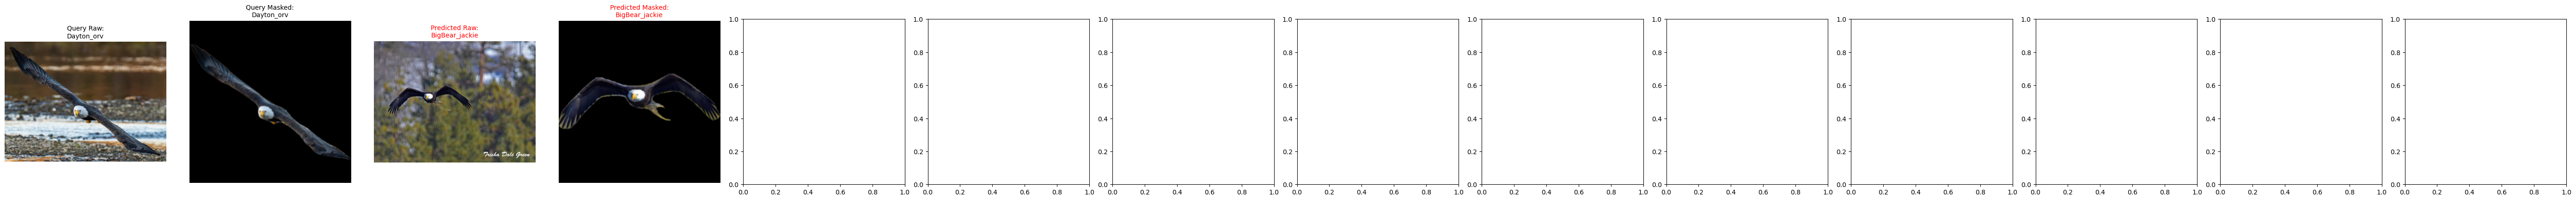

In [2]:
from train import get_basic_callbacks
from utils.viz_callback import SimilarityVizCallback

config['outdir'] = "train_trial_results"
config['use_wandb'] = False

# Path to the saved checkpoint
ckpt_path = "/Users/amee/Documents/code/master-thesis/EagleID/checkpoints/Acrface cosine anealing again lvl2.ckpt"

# model = ResNetPlusModel.load_from_checkpoint(
#     checkpoint_path=ckpt_path,
#     config=config,
# )
model = ResNetPlusModel(config = config)

viz_callback = SimilarityVizCallback(
            config=config, 
            outdir=config['outdir'], 
            log_every_n_epochs=1 
        )
callbacks = [viz_callback] if config['val_viz'] else []

trainer_args = {
        'max_epochs': 1,
        'callbacks': callbacks,
        'default_root_dir': config['outdir'],
        'accelerator': 'mps',
        'deterministic': True,
        'profiler': 'simple',
        'num_sanity_val_steps': -1, # -1 to check all validation data, 0 to turn off
        'precision': "32-true",
    }

trainer = Trainer(**trainer_args)
trainer.fit(model, data)

In [4]:
from data.combined_datasets import get_dataset


config['dataset'] = '/Users/amee/Documents/code/master-thesis/datasets/'
config['wildlife_name'] = 'raptors, BirdIndividualID'
config['only_cache'] = [True, True]
config['cache_path'] = '/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_allbirds_split.csv'
config['preprocess_lvl'] = 2
config['val_viz'] = True

data = get_dataset(config)

# Filter query and gallery metadata
data.val_query_dataset.metadata = data.val_query_dataset.metadata[data.val_query_dataset.metadata['wildlife_name'] == 'raptors']
data.val_gallery_dataset.metadata = data.val_gallery_dataset.metadata[data.val_gallery_dataset.metadata['wildlife_name'] == 'raptors']
print(f"Query images: {len(data.val_query_dataset.metadata)}")
print(f"Gallery images: {len(data.val_gallery_dataset.metadata)}")
print(f"Query labels: {data.val_query_dataset.metadata['identity'].unique()}")

# data = WildlifeDataModule(metadata=dataset.df, config = config)

# Path to the saved checkpoint
ckpt_path = "/Users/amee/Documents/code/master-thesis/EagleID/checkpoints/multispecies allbirds.ckpt"

model = ResNetPlusModel.load_from_checkpoint(
    checkpoint_path=ckpt_path,
    config=config,
)

model.eval()  # ensure eval mode

trainer = Trainer(accelerator="mps")
trainer.validate(model, dataloaders=data.val_dataloader())


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:328: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.metadata.loc[pd.isna(self.metadata['date']), 'date'] = "unknown"


Dataset size before pre-processing and cleaning: 2787
Removed 0 rows with invalid segmentation data.
Split: closed-set
Samples: train/test/unassigned/total = 2155/632/0/2787
Classes: train/test/unassigned/total = 109/93/0/109
Classes: train only/test only/joint  = 16/0/93

Fraction of train set     = 77.32%
Fraction of test set only = 0.00%
Training Set
Length: 2155
Number of individuals (classes): 109
Mean images/individual: 19.770642201834864
Min images/individual: 2
Max images/individual: 74
Test Set
Length: 632
Number of individuals (classes): 93
Mean images per individual: 6.795698924731183
Min images per individual: 1
Max images per individual: 20


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['query'] = df_test['query'].astype(bool)


Precomputed data loaded from bbox_mask for train_raptors__BirdIndividualID. Only to be used for processing lvl 2-5
Precomputed data loaded:
length of metadata: 2155
first 5 rows of metadata:
           image_id           species  identity_id    identity  \
0  012a691860d0efb5  sociable_weavers          NaN  011016A9DF   
1  05f4a08da3b5d7bb  sociable_weavers          NaN  011016A9DF   
2  0be589a0a94d12c3  sociable_weavers          NaN  011016A9DF   
3  14298ed789b2209a  sociable_weavers          NaN  011016A9DF   
4  19d52f6706a25484  sociable_weavers          NaN  011016A9DF   

                                                path from_video  video  date  \
0  BirdIndividualID/Original_pictures/IndividualI...        NaN    NaN   NaN   
1  BirdIndividualID/Original_pictures/IndividualI...        NaN    NaN   NaN   
2  BirdIndividualID/Original_pictures/IndividualI...        NaN    NaN   NaN   
3  BirdIndividualID/Original_pictures/IndividualI...        NaN    NaN   NaN   
4  BirdIndiv

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
GPU available: True (mps), used:

Query dataset length: 49
Gallery dataset length: 78
Query labels: [0 1 2 3 4]
Gallery labels: [0 0 0 0 0]


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Validation: |          | 0/? [00:00<?, ?it/s]

/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a).to(device=b.device if isinstance(b, torch.Tensor) else 'cpu')
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b).to(device=a.device)
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


using GPU to compute original distance
starting re_ranking


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃       DataLoader 1        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val/Recall@5        │   0.040816325694322586    │   0.040816325694322586    │
│       val/accuracy        │   0.040816325694322586    │   0.040816325694322586    │
│          val/mAP          │   0.022559283301234245    │   0.022559283301234245    │
│         val/mAP5          │    0.03741496428847313    │    0.03741496428847313    │
└───────────────────────────┴───────────────────────────┴───────────────────────────┘

[{'val/accuracy': 0.040816325694322586,
  'val/mAP': 0.022559283301234245,
  'val/mAP5': 0.03741496428847313,
  'val/Recall@5': 0.040816325694322586},
 {'val/accuracy': 0.040816325694322586,
  'val/mAP': 0.022559283301234245,
  'val/mAP5': 0.03741496428847313,
  'val/Recall@5': 0.040816325694322586}]

In [6]:
ckpt = torch.load(ckpt_path, map_location='mps')
print("Checkpoint state_dict:", list(ckpt['state_dict'].keys())[:10])
model = ResNetPlusModel.load_from_checkpoint(checkpoint_path=ckpt_path, config=config)
print("Conv1 weight:", model.backbone.conv1.weight[0, 0, :3, :3].detach().cpu().numpy())
print("Embedding BN mean:", model.embedding[1].running_mean[:5].detach().cpu().numpy())

/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_5940/3867829771.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location='mps

Checkpoint state_dict: ['backbone.conv1.weight', 'backbone.bn1.weight', 'backbone.bn1.bias', 'backbone.bn1.running_mean', 'backbone.bn1.running_var', 'backbone.bn1.num_batches_tracked', 'backbone.layer1.0.conv1.weight', 'backbone.layer1.0.bn1.weight', 'backbone.layer1.0.bn1.bias', 'backbone.layer1.0.bn1.running_mean']


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


Conv1 weight: [[-0.02139424 -0.01264519 -0.00547022]
 [-0.01271133  0.02050388  0.04731439]
 [-0.00697363  0.08007031  0.17147252]]
Embedding BN mean: [0.33045927 0.02276565 0.18406662 0.07647935 0.49813408]


In [18]:
# Get the list of DataLoaders (query and gallery)
val_loaders = data.val_dataloader()

# Access the Query DataLoader
query_loader = val_loaders[0]

# Extract a batch from the Query DataLoader
query_batch = next(iter(query_loader))

# Check how many elements are in the batch
print("Number of elements in batch:", len(query_batch))

# Adjust unpacking based on the batch structure (images, labels)
x, y = query_batch

# Forward pass to get output shape
model.eval()
with torch.no_grad():
    output = model(x)

print("Output shape:", output.shape)  # Should print (batch_size, embedding_size)

Number of elements in batch: 2
Output shape: torch.Size([4, 128])


Print predictions for model

In [19]:
from utils.triplet_loss_utils import KnnClassifier
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.features import DeepFeatures

from sklearn.metrics import precision_score, recall_score, f1_score
from utils.visualization import query_prediction_results_similarity
import numpy as np


In [20]:
# Evaluate the model in retrieval metrics -- ONLY ONE SPECIES IN DATASET ALREADY (NO FILTERING REQUIRED)
# dataset_database_P = WildlifeDataset(metadata.df.iloc[100:,:], metadata.root, transform=transform)
# dataset_query_P = WildlifeDataset(metadata.df.iloc[:100,:], metadata.root, transform=transform)
dataset_query_P = data.val_query_dataset
dataset_database_P = data.val_gallery_dataset

# name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor_P = DeepFeatures(model , device = 'cpu')

query_P, database_P = extractor_P(dataset_query_P), extractor_P(dataset_database_P)

similarity_function = CosineSimilarity()
similarity_P = similarity_function(query_P, database_P)
print(similarity_P)
classifier_P = KnnClassifier(k=1, database_labels=dataset_database_P.labels_string)
predictions_P = classifier_P(similarity_P['cosine'])
print("Predictions for 100 test Images:-\n",predictions_P)
accuracy_P = np.mean(dataset_query_P.labels_string == predictions_P)
print("Accuracy: {:.2f}%".format(accuracy_P * 100))

precision_P = precision_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
recall_P = recall_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
f1_P = f1_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
print("Precision:", precision_P)
print("Recall:", recall_P)
print("F1 Score:", f1_P)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.42s/it]

{'cosine': array([[ 0.8746631 ,  0.46505708,  0.42394385, ...,  0.8757773 ,
         0.33676684, -0.7084092 ],
       [ 0.5592804 ,  0.91528946,  0.93828565, ...,  0.5564125 ,
         0.9661575 ,  0.6225354 ],
       [ 0.2532197 ,  0.7360814 ,  0.7708305 , ...,  0.25020257,
         0.82549864,  0.84521306],
       ...,
       [ 0.9462284 ,  0.61194706,  0.5747042 , ...,  0.9469324 ,
         0.4954405 , -0.57585114],
       [ 0.9183883 ,  0.5491179 ,  0.5099808 , ...,  0.9195568 ,
         0.42665493, -0.637506  ],
       [ 0.8318452 ,  1.0000002 ,  0.9936341 , ...,  0.8300024 ,
         0.98727214,  0.28510058]], dtype=float32)}
19
93
Predictions for 100 test Images:-
 ['SouthScotland_heatherF05' 'England_022' 'BigBear_shadow' 'Orrhult_269K'
 'England_G318' 'England_G461' 'SouthScotland_shineB44' 'Alabama_natchez'
 'England_G818' 'England_G463' 'England_G818' 'England_G818'
 'SouthScotland_emily121' 'BigBear_jackie' 'SouthScotland_mapleF24'
 'England_022' 'SouthScotland_skanC17' 'So


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


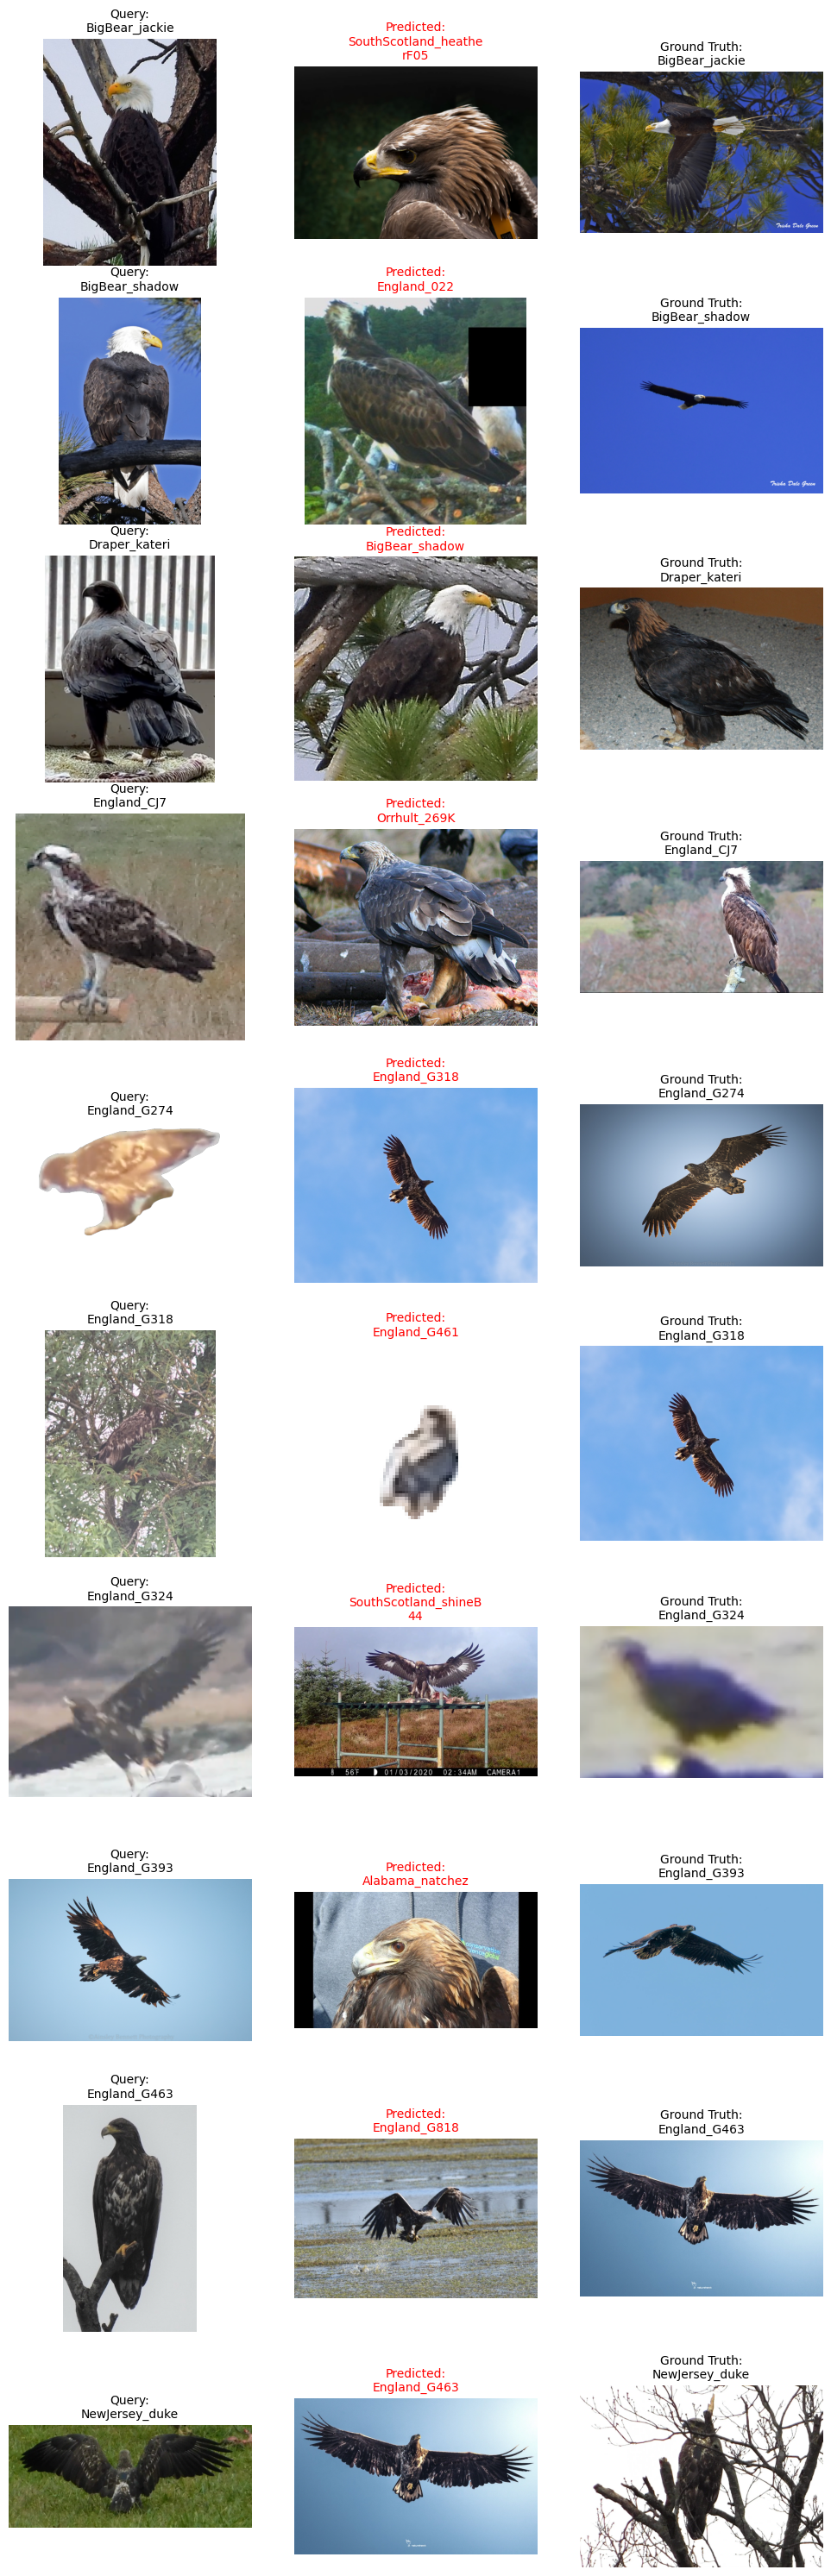

In [21]:
# prediction for dataset with just one species
query_prediction_results_similarity(
    root=config['dataset'],
    query_metadata=dataset_query_P.metadata,
    db_metadata=dataset_database_P.metadata,
    query_start=0,
    similarity_scores=similarity_P['cosine'],
    num_images=10
)